## 5.5 正则化

在深度学习中，常用的正则化技术包括 L2正则化、L1正则化和权重衰减。

L2正则化可以使得模型的参数值趋于平稳，防止过拟合。但是，L2正则化也有一些缺点，例如使得训练变慢、对稀疏数据无效等。因此，在使用 L2正则化时，我们需要根据实际情况选择合适的正则化系数 $\lambda$ ，使得模型能够得到较好的泛化能力。

L1正则化是另一种常用的正则化技术，它可以有效防止稀疏数据的过拟合。但是，L1正则化的惩罚项是参数的绝对值和，会使得模型的参数分布呈均匀分布。在使用 L1正则化时，我们也需要根据实际情况选择合适的正则化系数 $\lambda$ ，使得模型能够得到较好的泛化能力。

权重衰减是也是一种常用的正则化技术，它可以有效防止稀疏数据的过拟合。权重衰减的惩罚项是参数的平方，会使得模型的参数取值趋于较小。在使用权重衰减时，我们也需要根据实际情况选择合适的正则化系数 $\lambda$ ，使得模型能够得到较好的泛化能力。

在深度学习中，L2正则化是三种正则化技术中应用最广泛的。这是因为 L2正则化可以使得模型的参数值趋于平稳，防止过拟合。此外，L2正则化的计算复杂度也比较低，因此在训练模型时也不会太慢。我们这里重点介绍这种方法。

**梗直哥提示：对正则化的原理感兴趣，希望深入了解的同学，可以点击选修[“解一卷而众篇明”之机器学习核心概念精讲](https://aay.xet.tech/s/2TMAev)，用具体生动的例子，把正则化的前因后果，数学推导，几何意义，与MAP最大后验的关系等等各种知识给你讲个通透。**

### 5.5.1 L2正则化

在深度学习中，模型的复杂度往往随着层数的增加而增加。当模型太复杂时，它会记住训练数据中的细节，并且在测试数据上表现很差。这种现象被称为过拟合。为了避免过拟合，我们需要让模型尽量简单，这就是正则化的目的。

L2正则化通过给模型的损失函数添加一个模型参数的平方和的惩罚项来实现正则化。具体来说，我们可以把损失函数写成如下的形式：

$$Loss = Loss_{original} + \lambda \sum_{i=1}^n w_i^2$$

其中 $Loss_{original}$ 是原始的损失函数，$\lambda$ 是正则化系数，$w_i$ 是模型的参数，$n$ 是参数的数量。这个惩罚项的作用是给模型的参数加上一个惩罚，如果参数的值过大，则惩罚值也会很大，从而使得模型的参数值趋于平稳。

L2正则化有好几个重要优点：我们刚说过，它会使得模型的参数值趋于平稳。这意味着参数值不会过大，也不会过小。这样可以避免出现梯度爆炸和梯度消失的现象。它还有一个重要的优点：它可以防止过拟合。因为 L2正则化会惩罚模型的参数值，所以当模型的参数值较大时，损失函数的值也会较大。这样可以防止模型过拟合训练数据。当然，L2正则化也有一些缺点。例如，它会使得模型的训练变慢，因为损失函数中多了一个惩罚项，需要计算。此外，L2正则化也不能有效防止稀疏数据中的过拟合。

### 5.5.2 代码示例

下面是一个示例，展示了在使用和不使用 L2 正则化的情况下，训练误差和测试误差的变化：

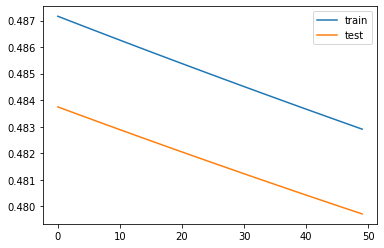

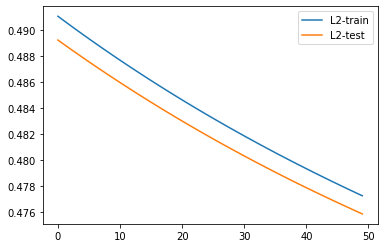

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import matplotlib.pyplot as plt

# 生成数据
X_train = torch.randn(1000, 30)
y_train = torch.sin(X_train) + torch.randn(1000, 30) * 0.1
X_test = torch.randn(100, 30)
y_test = torch.sin(X_test) + torch.randn(100, 30) * 0.1

# 假设我们有一个包含两个隐藏层的神经网络
model = torch.nn.Sequential(
    torch.nn.Linear(30, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 30)
)

# 定义损失函数和优化器
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 不使用 L2 正则化的情况
train_losses = []
test_losses = []

for epoch in range(50):
    # 计算训练损失
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())
    
    # 使用优化器更新权重
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 计算测试损失
    with torch.no_grad():
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)
        test_losses.append(loss.item())
    
# 绘制训练损失和测试损失的曲线
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

# 使用 L2 正则化的情况
model = torch.nn.Sequential(
torch.nn.Linear(30, 20),
torch.nn.ReLU(),
torch.nn.Linear(20, 10),
torch.nn.ReLU(),
torch.nn.Linear(10, 30)
)

#定义损失函数和优化器
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.1) # 加入 L2 正则化

train_losses = []
test_losses = []

for epoch in range(50):
    # 计算训练损失
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())

    # 使用优化器更新权重
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 计算测试损失
    with torch.no_grad():
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)
        test_losses.append(loss.item())

#绘制训练损失和测试损失的曲线
plt.plot(train_losses, label='L2-train')
plt.plot(test_losses, label='L2-test')
plt.legend()
plt.show()

在这个例子中，使用了 PyTorch 的数据生成函数 `torch.randn()` 和 `torch.sin()` 来生成训练数据和测试数据。然后构建了一个包含两个隐藏层的神经网络，并使用随机生成的数据进行训练。在第一个循环中，我们没有使用 L2 正则化；在第二个循环中，我们使用了 L2 正则化。

在两个循环中，我们都计算了训练数据和测试数据的损失，并将训练数据和测试数据的损失添加到列表 train_losses 和 test_losses 中，然后使用 Matplotlib 绘制了两组损失的曲线。在使用 L2 正则化的情况下，你可以看到训练损失和测试损失的差距变小了，这表明 L2 正则化有助于减小过拟合。


[Next 5-6 Dropout](./5-6%20Dropout.ipynb)